In [3]:
from google.colab import drive
drive.mount('/contentdrive/')

Mounted at /contentdrive/


#Import csv File

In [4]:
# Import Numpy and Pandas Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json('/contentdrive/MyDrive/tweets.json', lines=True)

In [5]:
data.head()

,keyword,likes,tweet
0,COVID-19,1,The headline kinda makes it sound like the AP ...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...
2,COVID-19,0,I feel like Diana's line she draws is if his s...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...


In [6]:
data.describe()

,likes
count,128837.000000
mean,23.898453
std,584.283219
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,82843.000000


#Create Dataframe for tweets about Bitcoin

In [8]:
bitcoin_data = data[data['keyword'].str.contains('bitcoin', case=False, na=False)].copy()


In [9]:
bitcoin_data.head()

,keyword,likes,tweet
15003,Bitcoin,3,Is #Bitcoin 📷 on the verge of realizing its en...
15004,Bitcoin,1,Bitcoin breaking down. Where is the price goin...
15005,Bitcoin,456,$PEPE IS THE NEW BITCOIN
15006,Bitcoin,0,Contextual marketing at its best!
15007,Bitcoin,0,Bitcoin Payments App Strike Expands to More Th...


#Counts of Reacts

In [10]:
bitcoin_data['likes'].value_counts()


,count
likes,
0,2274
1,968
2,485
3,260
4,141
...,...
74,1
25880,1
2357,1


#Most Appearing Words

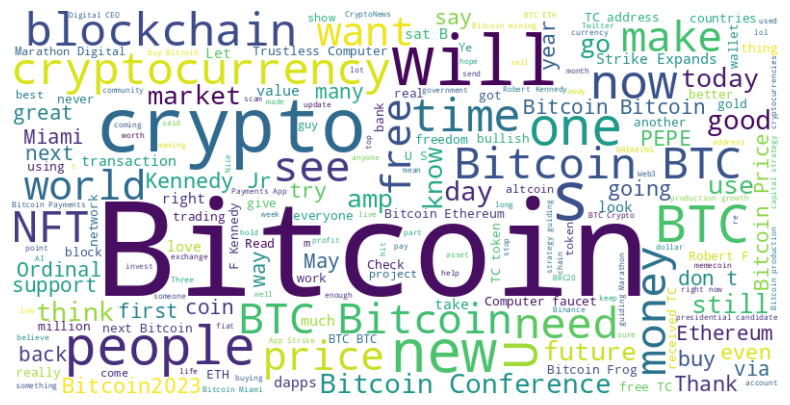

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(tweet for tweet in bitcoin_data['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Create Distribution for Likes

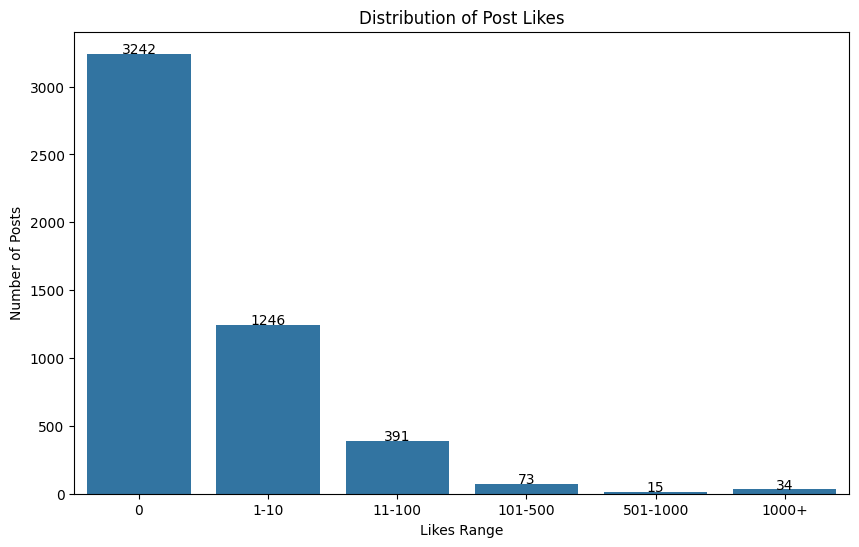

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create Bins for Likes
bins = [0, 1, 10, 100, 500, 1000, bitcoin_data['likes'].max()]
labels = ['0', '1-10', '11-100', '101-500', '501-1000', '1000+']
data['likes_group'] = pd.cut(bitcoin_data['likes'], bins=bins, labels=labels, include_lowest=True)

# Plot Criteria
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='likes_group', order=labels)
plt.xlabel('Likes Range')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Likes')

# Add Labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha="center")

plt.show()


#Cleaning for text

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\@\w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

bitcoin_data['clean_tweet'] = bitcoin_data['tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Using Sentiment analysis model

In [14]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

bitcoin_data['sentiment'] = bitcoin_data['clean_tweet'].apply(get_sentiment)


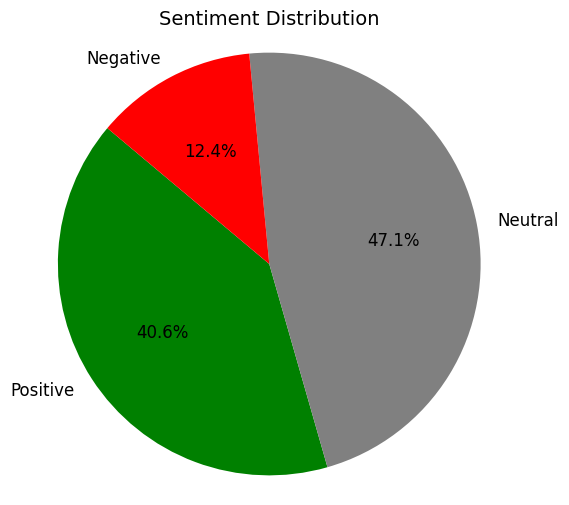

In [15]:
import matplotlib.pyplot as plt

# Count the sentiment
sentiment_counts = bitcoin_data['sentiment'].value_counts()

# Categories the sentiment
sentiment_counts = sentiment_counts.reindex(['Positive', 'Neutral', 'Negative'])

# Color coding for Sentiment
colors = ['green', 'grey', 'red']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title('Sentiment Distribution', fontsize=14)
plt.axis('equal')
plt.show()

#Most Common Words in Every Status tweets

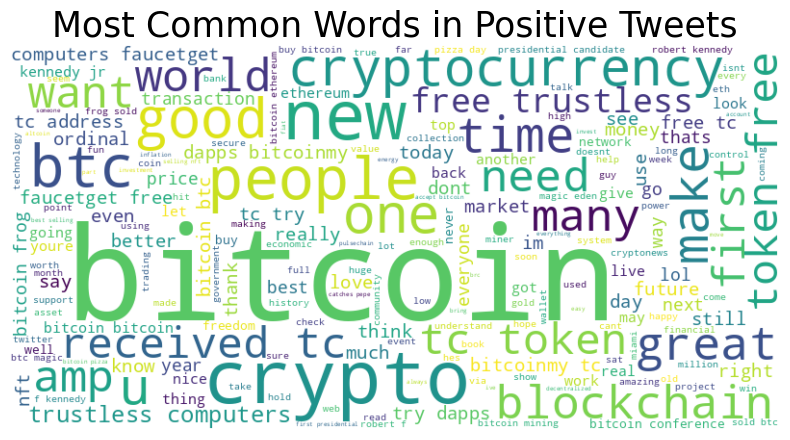

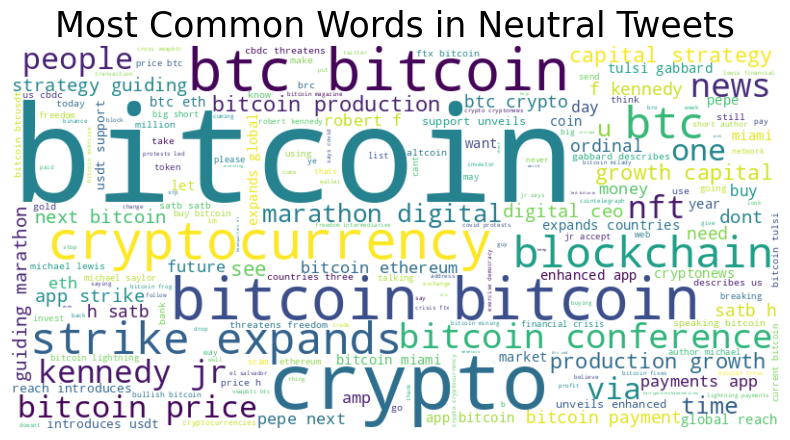

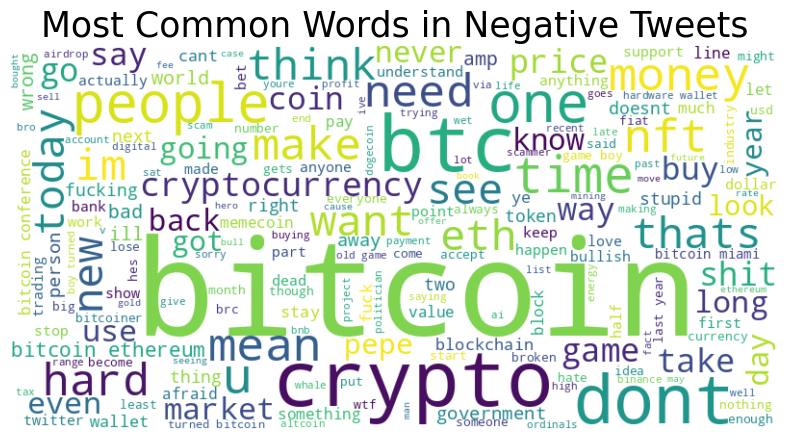

In [16]:
from wordcloud import WordCloud

sentiments = ['Positive', 'Neutral', 'Negative']

for sentiment in sentiments:
    text = " ".join(tweet for tweet in bitcoin_data[bitcoin_data['sentiment'] == sentiment]['clean_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment} Tweets', fontsize=25)
    plt.show()


###Calculate the average likes for every sentiment

In [17]:
likes_mean = bitcoin_data.groupby('sentiment')['likes'].mean().reindex(['Positive', 'Neutral', 'Negative'])
print(likes_mean)


sentiment
Positive    58.719428
Neutral     78.897621
Negative    10.744750
Name: likes, dtype: float64


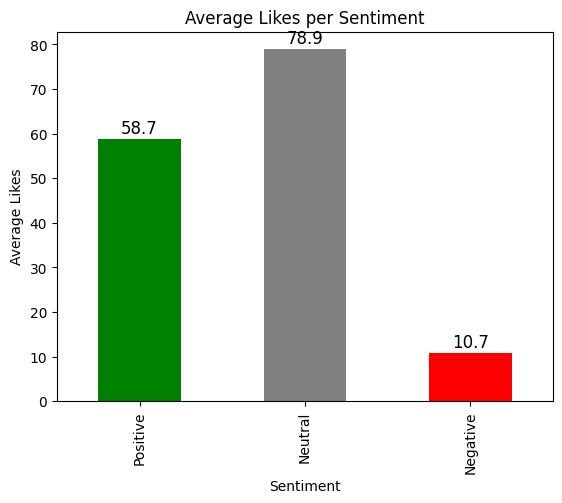

In [18]:
ax = likes_mean.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Average Likes per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')

#For Labels
for i in ax.patches:
    ax.annotate(f'{i.get_height():.1f}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.show()


#Most Common Words Using

In [22]:
from collections import Counter

all_words = ' '.join(bitcoin_data['clean_tweet']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(15)
for word, count in most_common_words:
    print(word, ":", count)


bitcoin : 4246
btc : 720
crypto : 612
price : 292
like : 241
people : 227
eth : 224
free : 219
us : 219
ethereum : 216
dont : 210
cryptocurrency : 206
tc : 201
one : 178
pepe : 176


<ipython-input-30-7a11cafcd385>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=words_df, x='word', y='count', palette='viridis')


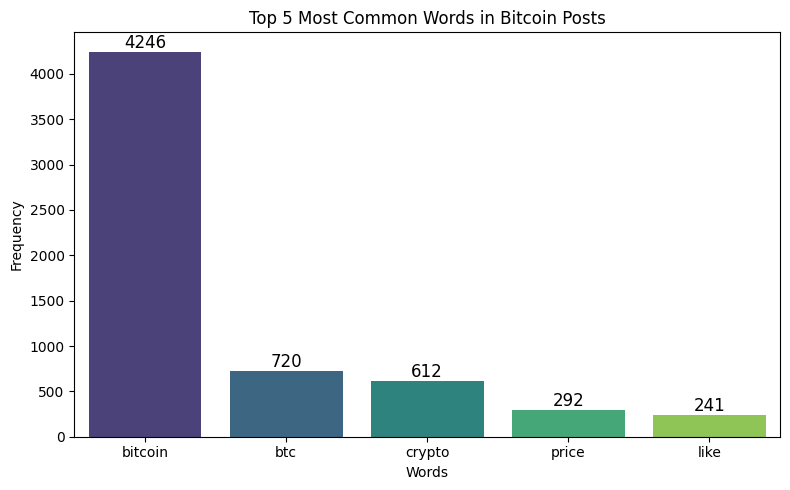

In [30]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Merge Words in Clened Text
all_words = ' '.join(bitcoin_data['clean_tweet']).split()

#  Count for Words
word_counts = Counter(all_words)
most_common_5 = word_counts.most_common(5)

# Convert to DataFrame
words_df = pd.DataFrame(most_common_5, columns=['word', 'count'])



# Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=words_df, x='word', y='count', palette='viridis')
# Adding Labels
for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Top 5 Most Common Words in Bitcoin Posts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()